In [6]:
# Intro to Regression
# Simple Regression
# - Linear or Non Linear: 1 dependent and 1 independent
# Multiple Linear Regression
# - Linear or Non Linear, more than 1

# Applications
# Sales forecasting, Satisfaction Analysis, Price estimation, Employment income

# Alogirthms
# Ordinal, Poisson, Fast forest quantile, Linear, Polynomial, Lasso, Stepwise, Ridge
# Bayesian linear, neural network, decision forest, Boosted decision tree, KNN

In [7]:
# Model Evaluation approaches :
# - Train and Test on the Same Dataset (High training accuracy, Out-of-Sample Accuracy)
# - Train/Test Split
# 
# K-fold cross validation resolves problems of both
# - 4 fold. 1st trained, rest tested for evaluation. 2nd trained and rest tested and so on. Accuracy = avg

In [8]:
# Evaluation Metrics
# - Error is difference
# - MAE, MSE, RMSE, RAE, RSE, R^2 = 1-RSE

In [9]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv('fuel_consumption.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221


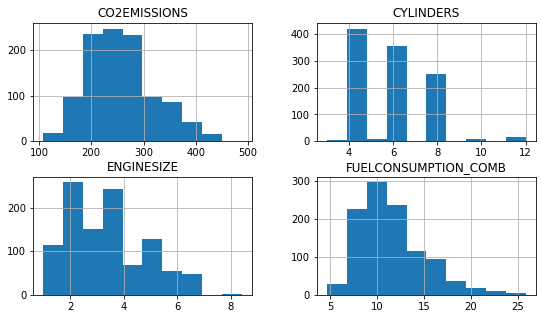

In [13]:
cdf.hist(figsize=(9,5))
plt.show()

In [14]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

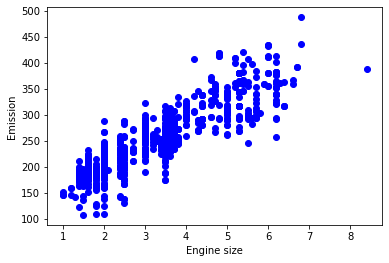

In [15]:
# Simple Regression Model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [16]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)


Coefficients :  [[39.55025368]]
Intercept :  [123.78558549]


Text(0, 0.5, 'Emission')

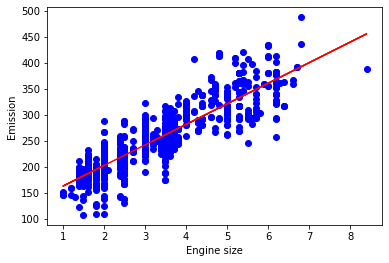

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
# Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = regr.predict(test_x)

print("Mean Absolute Error : ", np.mean(np.absolute(test_yhat - test_y)))
print("Residua sum of squares (MSE) : ", np.mean((test_yhat - test_y)**2))
print("R2-score : ", r2_score(test_yhat, test_y))

Mean Absolute Error :  23.912709194079365
Residua sum of squares (MSE) :  991.028465781505
R2-score :  0.7010761997657329


In [19]:
# Multiple Linear Regression

# yhat = Q^T * X
# MSE = 1/n * Total((yi-yhati)^2)
# Minimize MSE
# How to estimate Q?
# - Ordinary Least Squares : 
# -- Linear Algebra Operations
# --- Takes a long time for large datasets(10k+ rows)
# -- Optimization Algorithm :
# --- Gradient Descent
# ---- Proper approach if you have a very large dataset
# ---- Iterative until minimize MSE

In [23]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print("Coefficients : ", regr.coef_)

Coefficients :  [[11.65319393  6.90336285  9.73390109]]


In [ ]:
# sklearn USES Ordinary Least Squares to estimate coefficients and intercept
# it tries to minimize the sum of squared errors (SSE) or mean squared error (MSE)


In [24]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares : ", np.mean((y_hat-y)**2))
print("Variance score:", regr.score(x,y))

Residual sum of squares :  563.0398535344173
Variance score: 0.8582526985863799


In [25]:
# Non-Linear Regression
# Quadratic ( Parabolic Regression ), Cubic Regression, Linear regresion can be called Polynomial Regression
# Pick a regression that fits the data best

In [26]:
# Polynomial Regression
# - Some curvy data can be modeled by a polynomial regression
# - yhat = Q0 + Q1 * x + Q2 * x^2 + Q3 * x^3

# A polynomial regression model can be transformed into linear regression model
# x1 = x, x2 = x^2 , x3 = x^3 -> yhat = Q0 + Q1*X1 + Q2*X2 + Q3*X3 -> Multiple Linear Regression -> Least Squares

# Non-linear regression
# - To model non-linear relationship between the dependent variable and a set of independent variables
# - yhat must be a non-linear function of the parameters Q, not necessarily the features x
# -- yhat = Q0 + Q2^2 * x
# -- yhat = Q0 + Q1 * Q2 * Q2* X^T
# -- yhat = log(Q0 + Q1x + Q2 * x^2 + Q3 * x^3)
# -- yhat = Q0 / 1 + Q1^(x-Q2)
# We can't use ordinary Least Squares method to fit the data
# Estimating parameters isn't easy

# How can I know ?
# - Inspect visually
# - Correlation coefficients ?
# - Based on accuracy

# How should I model my data
# - Polynomial regression
# - Non-linear regression model
# - Transform your data


In [27]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [28]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

print('Coefficients : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coefficients :  [[ 0.         49.29229942 -1.30991333]]
Intercept :  [108.4555766]


Text(0, 0.5, 'Emissions')

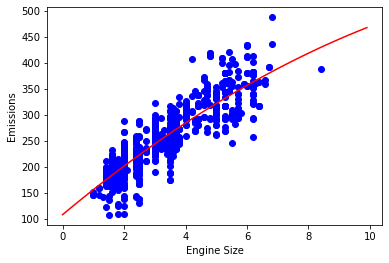

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [30]:
# Evaluation
test_x_poly = poly.fit_transform(test_x)
test_yhat = clf.predict(test_x_poly)

print("Mean absolute error : ", np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE) : ", np.mean((test_yhat - test_y)**2))
print("R2-score : ", r2_score(test_yhat, test_y))

Mean absolute error :  23.643649647943306
Residual sum of squares (MSE) :  970.4104578775557
R2-score :  0.7029676227528925


Coefficients:  [[ 0.         27.0729872   4.93984553 -0.53028768]]
Intercept:  [131.66212614]
Mean absolute error:  23.558020300018768
Residual sum of squares (MSE):  965.469770104785
R2-score:  0.7006705184379836


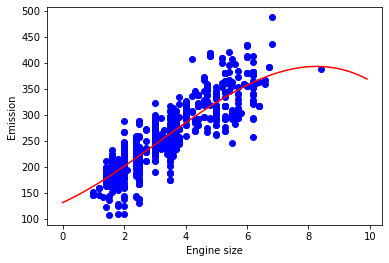

In [33]:
train_y = np.asanyarray(train[['CO2EMISSIONS']])
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

print("Mean absolute error: ", np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): ",  np.mean((test_y3_ - test_y) ** 2))
print("R2-score: ",r2_score(test_y3_ , test_y) )

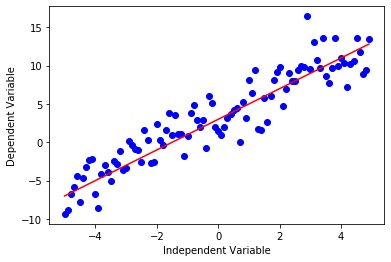

In [34]:
# Non-Linear Regression

# Linear 
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

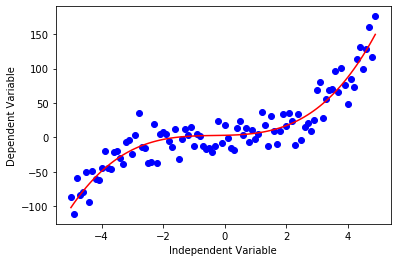

In [37]:
# Qubic
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

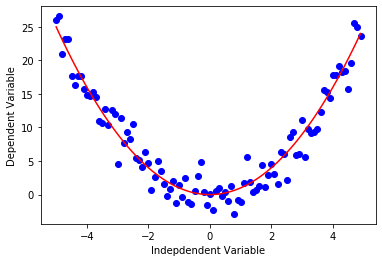

In [40]:
# Quadratic

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

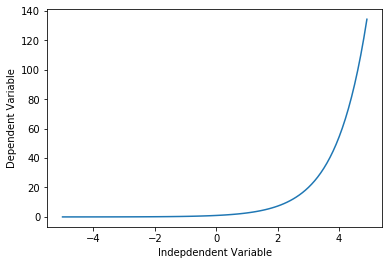

In [42]:
# Exponential 

y= np.exp(x)

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

c:\users\metin\desktop\workspace\pythonenvs\ibmds\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


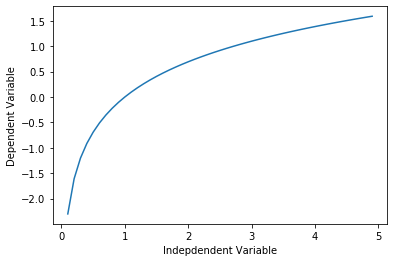

In [43]:
# Logaritmic

y = np.log(x)

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

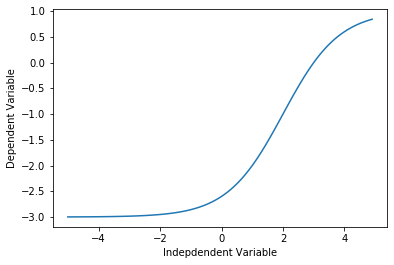

In [44]:
# Sigmoidal / Logistic



y = 1-4/(1+np.power(3, x-2))

plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [46]:
# Non-Linear Regression Example

df = pd.read_csv('china_gdp.csv')
df.head(2)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10


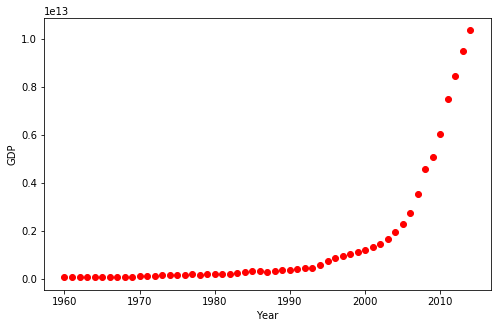

In [47]:
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.figure(figsize=(8,5))
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [48]:
# Choosing a model : Logistic function could be a good approximation: slow growt -> increasing -> decreasing
# formula : yhat = 1/1+e^(-B1(X-B2))
# B1 : controls the curve's steepness
# B2 : Slides the curve on the x-axis

In [49]:
# Building the model
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

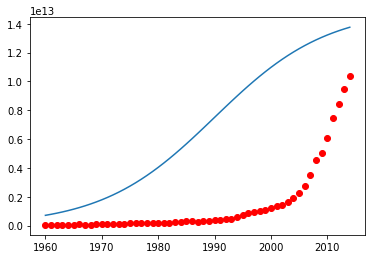

In [50]:
beta_1 = 0.10
beta_2 = 1990.0

y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [51]:
# Normalize Data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [53]:
# find best parameters for fit line
# curve_fit uses non-linear least squares to fit sigmoid function to data

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = {}, beta_2 = {}".format(popt[0], popt[1]))

 beta_1 = 690.4517109968472, beta_2 = 0.9972071272536187


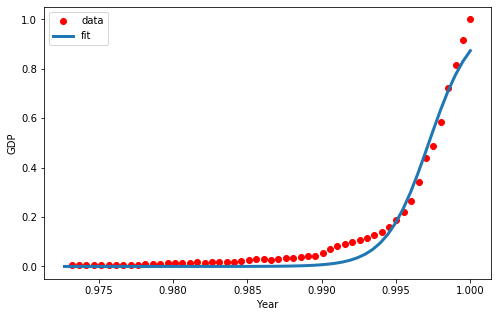

In [54]:
# Plot regression model

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')

plt.show()

In [55]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

yhat = sigmoid(test_x, *popt)

print('Mean Absolute Error : ', np.mean(np.absolute(yhat-test_y)))
print('Residual Sum of Squares (MSE) : ', np.mean((yhat - test_y)**2))
print('R-2 Score : ', r2_score(yhat, test_y))

Mean Absolute Error :  0.018806314250722996
Residual Sum of Squares (MSE) :  0.0005486656538212288
R-2 Score :  0.7353827222489491
